In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
dataset = pd.read_csv('data.csv')
dataset=dataset.iloc[:,1:-1]

In [3]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
dataset.shape

(569, 31)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
dataset.isna().sum().sum()

0

In [7]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
dataset.duplicated().sum()

0

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['diagnosis']=le.fit_transform(dataset['diagnosis'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

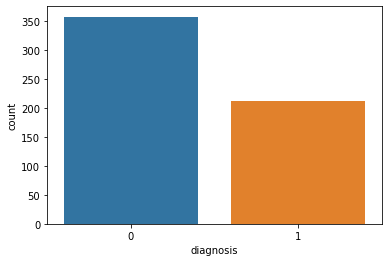

In [10]:
sns.countplot(dataset['diagnosis'])

In [11]:
dataset.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [42]:
np.array(dataset.iloc[1,:])

array([1.000e+00, 2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02,
       7.864e-02, 8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01,
       7.339e-01, 3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02,
       1.340e-02, 1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02,
       1.956e+03, 1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01,
       8.902e-02])

In [12]:
le.classes_

array(['B', 'M'], dtype=object)

<AxesSubplot:>

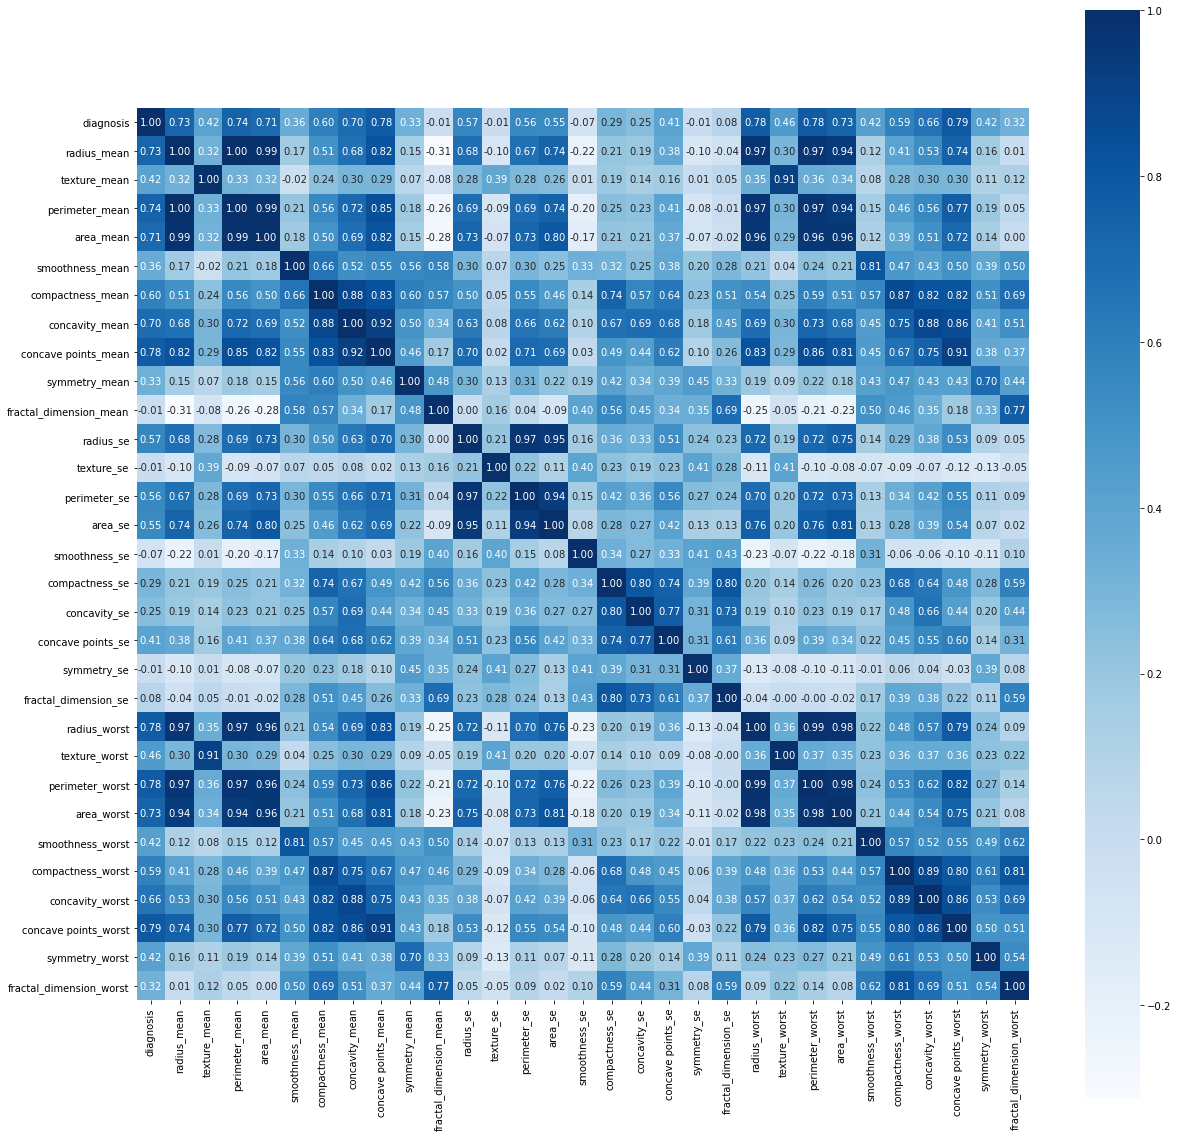

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(dataset.corr(),cmap='Blues',annot=True,square=True,fmt='.2f')

In [14]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

In [15]:
X.shape,y.shape

((569, 30), (569,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=40)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

# StandardScaler

In [18]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [19]:
X_train_sc.shape

(455, 30)

# PCA

In [20]:
pca=PCA(2)
X_train_pca=pca.fit_transform(X_train_sc)
X_test_pca=pca.transform(X_test_sc)

In [21]:
X_train_pca.shape

(455, 2)

In [22]:
y_train.shape

(455,)

<AxesSubplot:>

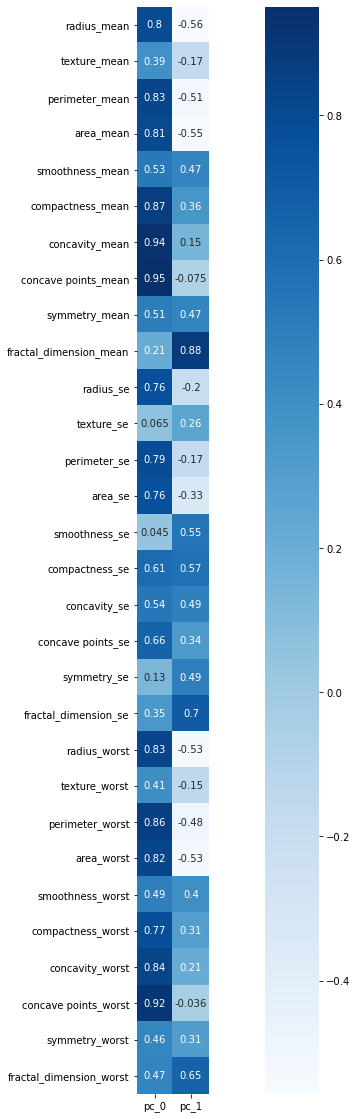

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(pd.DataFrame(np.c_[X_train_sc,X_train_pca]).corr().iloc[:30,30:],cmap='Blues',annot=True,
            square=True,yticklabels=dataset.columns[1:],xticklabels=['pc_0','pc_1'])

# Plot decision boundary function

In [24]:
# visualization of classification
# for 2 input features only, not for 2+
def plot_boundary(X_train_pca,X_test_pca,y_train,y_test,classifier):
    x=np.arange(X_train_pca[:,0].min()-1,X_train_pca[:,0].max()+1,0.1)
    y=np.arange(X_train_pca[:,1].min()-1,X_train_pca[:,1].max()+1,0.1)
    XX,YY=np.meshgrid(x,y)
    labels_output= classifier.predict(np.array([XX.ravel(),YY.ravel()]).T)
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.contourf(XX,YY,labels_output.reshape(XX.shape))
    plt.scatter(X_train_pca[y_train==0,0],X_train_pca[y_train==0,1],alpha=1,edgecolor = 'k',s=40,label=0)
    plt.scatter(X_train_pca[y_train==1,0],X_train_pca[y_train==1,1],alpha=1,edgecolor = 'k',s=40,label=1)
    plt.legend(loc='upper left')
    plt.subplot(122)
    plt.contourf(XX,YY,labels_output.reshape(XX.shape))
    plt.scatter(X_test_pca[y_test==0,0],X_test_pca[y_test==0,1],alpha=1,edgecolor = 'k',s=40,label=0)
    plt.scatter(X_test_pca[y_test==1,0],X_test_pca[y_test==1,1],alpha=1,edgecolor = 'k',s=40,label=1)
    plt.legend(loc='upper left')
    plt.show()

# Logistic Regression

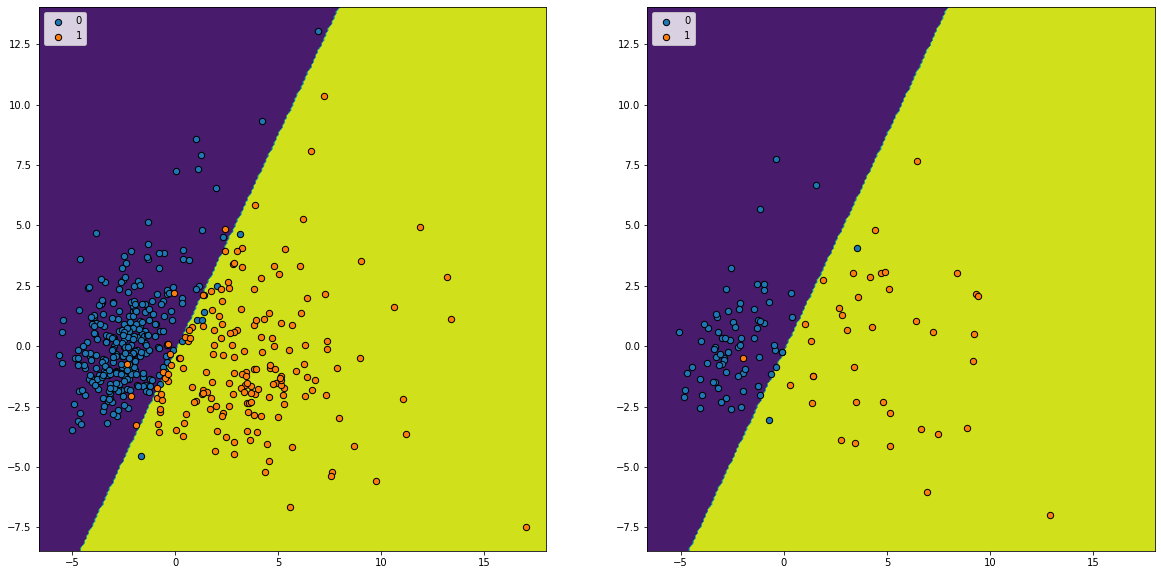

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_pca, y_train)
y_pred=classifier.predict(X_test_pca)
# print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
plot_boundary(X_train_pca,X_test_pca,y_train,y_test,classifier)

# KNN

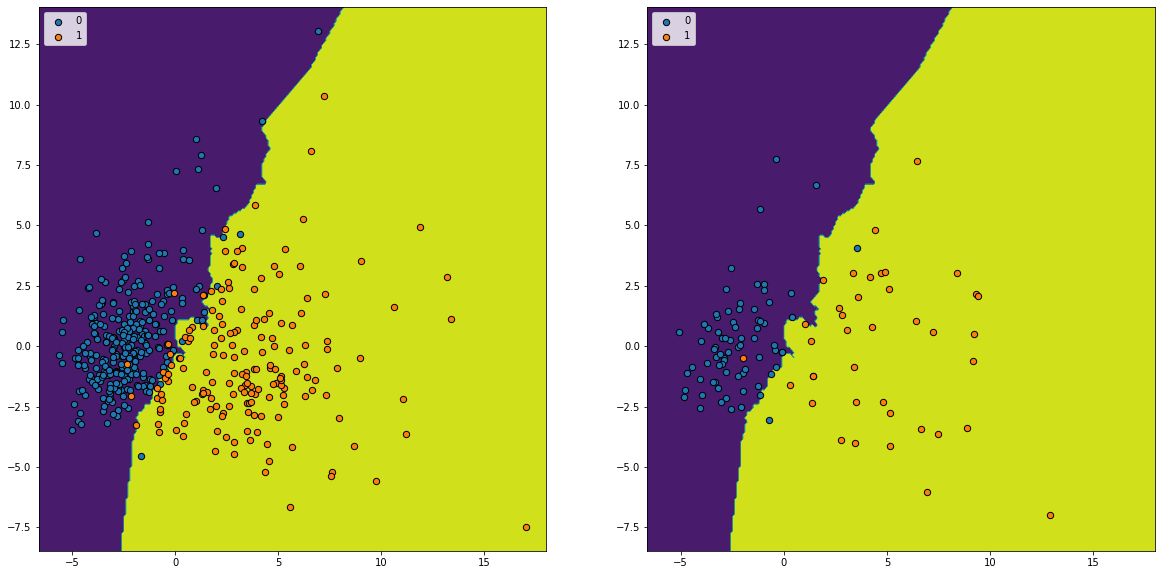

In [26]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_pca, y_train)
y_pred_knn = knn_classifier.predict(X_test_pca)
# print(classification_report(y_test,y_pred_knn))
# print(confusion_matrix(y_test,y_pred_knn))
plot_boundary(X_train_pca,X_test_pca,y_train,y_test,knn_classifier)

# DTC

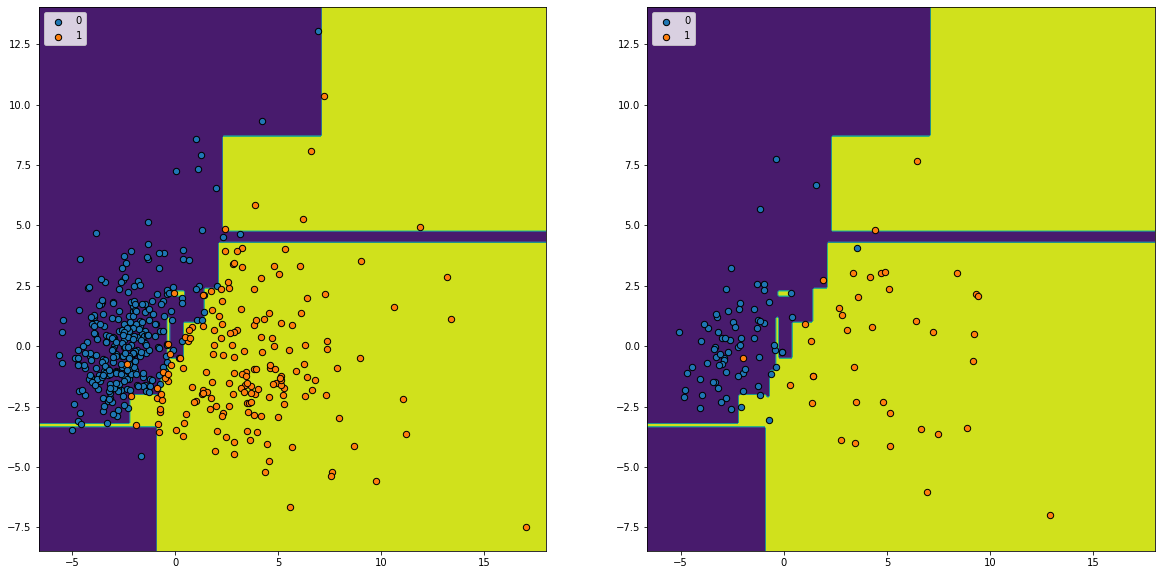

In [27]:
# # Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_pca, y_train)
y_pred_dt = dt_classifier.predict(X_test_pca)
# print(classification_report(y_test,y_pred_dt))
# print(confusion_matrix(y_test,y_pred_dt))
plot_boundary(X_train_pca,X_test_pca,y_train,y_test,dt_classifier)

# RFC

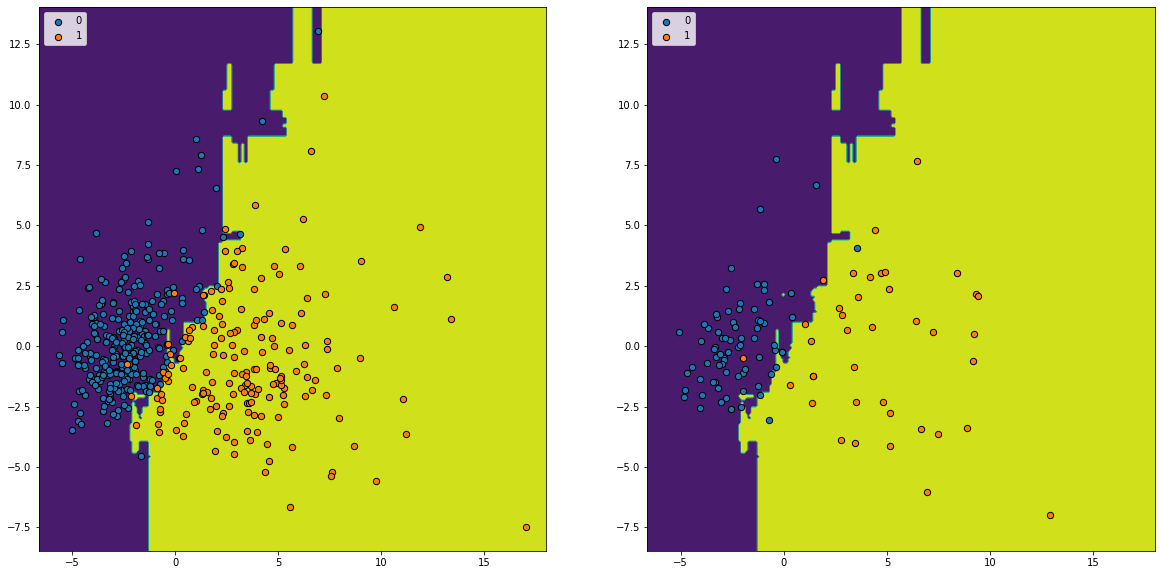

In [28]:
# # Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_pca, y_train)
y_pred_rf = rf_classifier.predict(X_test_pca)
# print(classification_report(y_test,y_pred_rf))
# print(confusion_matrix(y_test,y_pred_rf))
plot_boundary(X_train_pca,X_test_pca,y_train,y_test,rf_classifier)

# Adaboost

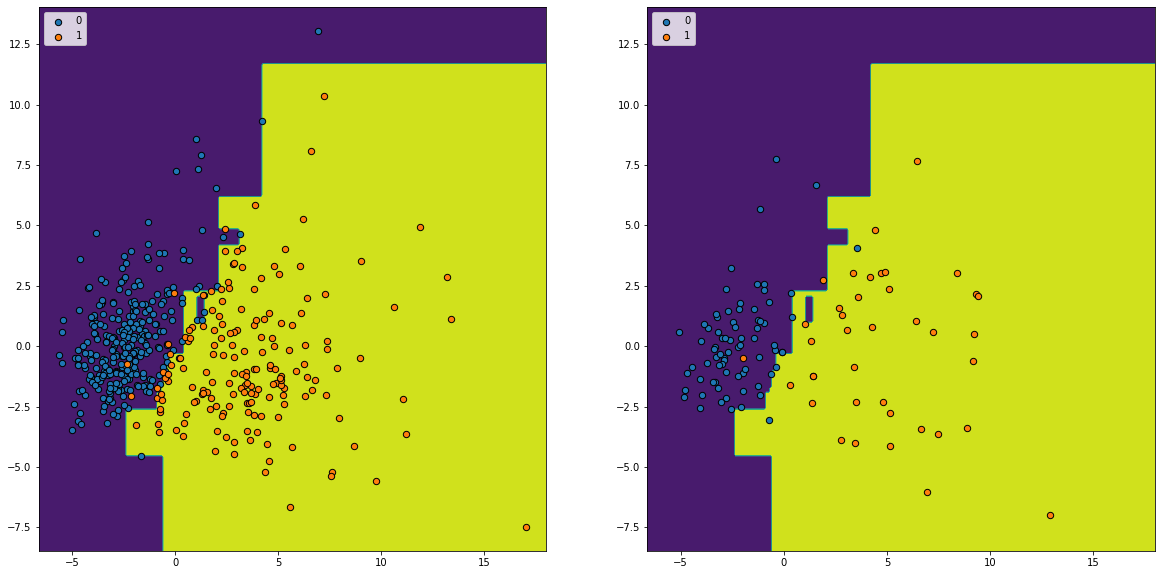

In [29]:
# # Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train_pca, y_train)
y_pred_ada = ada_classifier.predict(X_test_pca)
# print(classification_report(y_test,y_pred_ada))
# print(confusion_matrix(y_test,y_pred_ada))
plot_boundary(X_train_pca,X_test_pca,y_train,y_test,ada_classifier)

# CV

In [30]:
for i in [classifier,knn_classifier,dt_classifier,rf_classifier,ada_classifier]:
    print(f'{i} mean accuracy:',np.mean(cross_val_score(i,X_train_pca,y_train,scoring='accuracy')))
    print(f'{i} mean recall:',np.mean(cross_val_score(i,X_train_pca,y_train,scoring='recall')))

# print(' mean accuracy:',np.mean(cross_val_score(classifier,X_train_pca,y_train,scoring='accuracy')))
# print(' mean recall:',np.mean(cross_val_score(classifier,X_train_pca,y_train,scoring='recall')))

LogisticRegression() mean accuracy: 0.956043956043956
LogisticRegression() mean recall: 0.9421848739495798
KNeighborsClassifier() mean accuracy: 0.9428571428571428
KNeighborsClassifier() mean recall: 0.9248739495798318
DecisionTreeClassifier() mean accuracy: 0.9186813186813186
DecisionTreeClassifier() mean recall: 0.9015126050420168
RandomForestClassifier() mean accuracy: 0.9384615384615385
RandomForestClassifier() mean recall: 0.9307563025210085
AdaBoostClassifier() mean accuracy: 0.9362637362637363
AdaBoostClassifier() mean recall: 0.9364705882352942


In [31]:
# selected Logistic Regression as classifier because of high acuracy and recall

# Final classifier with pipeline

In [32]:
pipe = Pipeline([
    ('p_sc',StandardScaler()),
    ('p_pca',PCA(2)),
    ('p_classifier',LogisticRegression())
])
pipe.fit(X_train, y_train)
y_pred_fin=pipe.predict(X_test)
print(classification_report(y_test,y_pred_fin))
print(confusion_matrix(y_test,y_pred_fin))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[73  2]
 [ 1 38]]


 # Gridsearch CV


In [33]:
parameters = {'p_classifier__C': [0.01,0.1,0.5,1,5,10,50]}

gscv=GridSearchCV(pipe,parameters, scoring = 'accuracy',cv=10)
gscv.fit(X,y)
print('gscv accuracy',gscv.best_params_,gscv.best_score_)

gscv=GridSearchCV(pipe,parameters, scoring = 'recall',cv=10)
gscv.fit(X,y)
print('gscv recall',gscv.best_params_,gscv.best_score_)
# following params are selected because fractional values are also considered

gscv accuracy {'p_classifier__C': 0.5} 0.9543546365914788
gscv recall {'p_classifier__C': 5} 0.938961038961039


# Validation curve

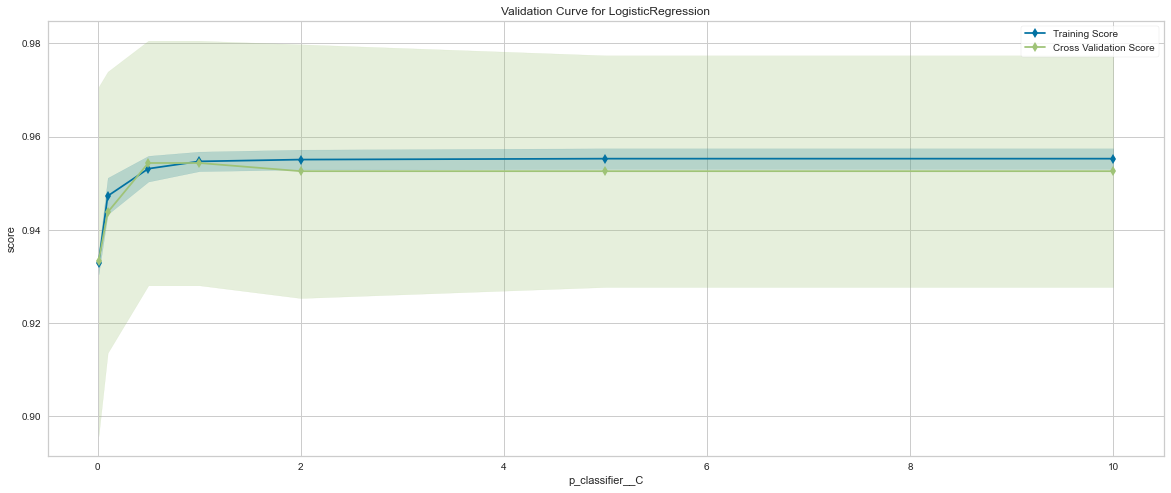

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for LogisticRegression'}, xlabel='p_classifier__C', ylabel='score'>,
                cv=10,
                estimator=Pipeline(steps=[('p_sc', StandardScaler()),
                                          ('p_pca', PCA(n_components=2)),
                                          ('p_classifier',
                                           LogisticRegression())]),
                param_name='p_classifier__C',
                param_range=array([ 0.01,  0.1 ,  0.5 ,  1.  ,  2.  ,  5.  , 10.  ]),
                scoring='accuracy')


In [34]:
from yellowbrick.model_selection import validation_curve
plt.figure(figsize=(20,8))
print(validation_curve(pipe, X, y, param_name="p_classifier__C",
      param_range=[0.01,0.1,0.5,1,2,5,10], cv=10, scoring="accuracy"))

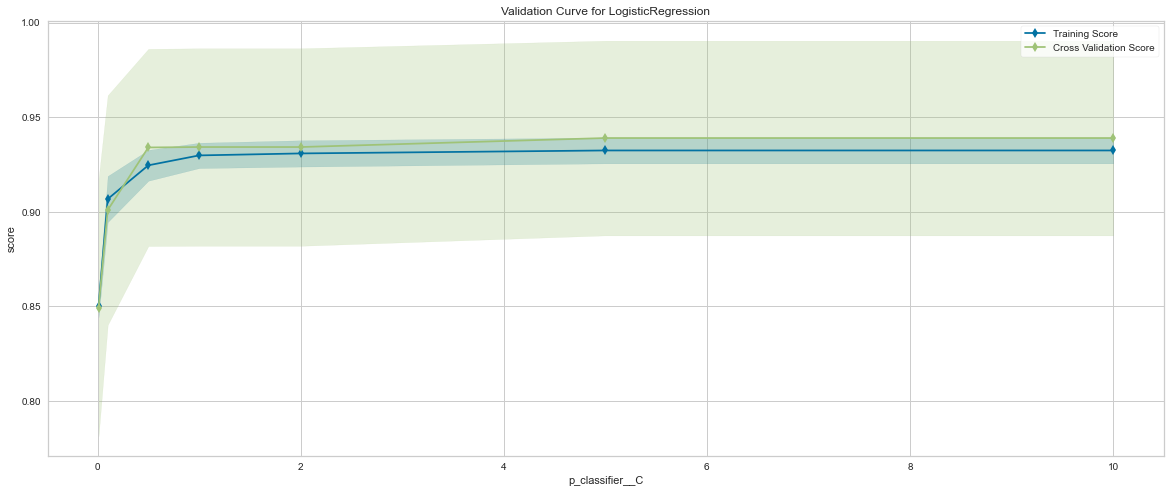

ValidationCurve(ax=<AxesSubplot:title={'center':'Validation Curve for LogisticRegression'}, xlabel='p_classifier__C', ylabel='score'>,
                cv=10,
                estimator=Pipeline(steps=[('p_sc', StandardScaler()),
                                          ('p_pca', PCA(n_components=2)),
                                          ('p_classifier',
                                           LogisticRegression())]),
                param_name='p_classifier__C',
                param_range=array([ 0.01,  0.1 ,  0.5 ,  1.  ,  2.  ,  5.  , 10.  ]),
                scoring='recall')


In [35]:
plt.figure(figsize=(20,8))
print(validation_curve(pipe, X, y, param_name="p_classifier__C",
      param_range=[0.01,0.1,0.5,1,2,5,10], cv=10, scoring="recall"))

In [36]:
# from above plots, at C=1, model gets generalised.

# Final classifier pipeline with tuned hyperparameter 

In [37]:
from sklearn.compose import ColumnTransformer
pipe_2 = Pipeline([
    ("p_sc", StandardScaler()),
    ('p_pca',PCA(2)),
    ('p_classifier',LogisticRegression(C=1))
])
pipe_2.fit(X_train, y_train)
y_pred_fin=pipe_2.predict(X_test)
print(classification_report(y_test,y_pred_fin))
print(confusion_matrix(y_test,y_pred_fin))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[73  2]
 [ 1 38]]


In [38]:
# We achieved recall=0.97 & accuracy =0.97

# Learning curve

In [ ]:
from yellowbrick.model_selection import learning_curve
plt.figure(figsize=(20,8))
try:
    print(learning_curve(pipe, X, y, cv=10, scoring='accuracy',train_sizes=np.linspace(0.01,1,20)))
except:
    pass

In [ ]:
plt.figure(figsize=(20,8))
try:
    print(learning_curve(pipe, X, y, cv=10, scoring='recall',train_sizes=np.linspace(0.01,1,20)))
except:
    pass

In [ ]:
# minimum training size for model training = 300 samples approx

In [39]:
import joblib
joblib.dump(pipe_2,'breast_cancer_detector.pkl')
# joblib.load('filename')

['breast_cancer_detector.pkl']